# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load in Data

The dataset used is available in the GitHub repository under the name **"credit_card_churn.csv**. This data was retrieved from Kaggle.com, with a direct link located in the repository README file.

In [2]:
#Use pandas, load in dataset 
credit_df = pd.read_csv("credit_card_churn.csv")

#Check that data loaded in correctly
credit_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Understanding the Data

Before going into the deep analysis, it is essential to understand the data that will be used in the modeling solution. Looking at the properties this data set will provide enough information to determine if a solution to the customer attrition issue can be produced.

In [3]:
#credit_df.info()

There are no nulls present in any of the variables, each has 10127 observations - indicating no need to alter the dataset due to missing information. There are 23 columns, 10127 observations, and no null values. Some of these columns will not be necessary for the later stages of analysis and can be subsequently cut from our working dataframe. 



To get a better idea of what can be cut, here are the variable names and definitions:
1. **CLIENTNUM**: *Client number. Unique identified for the customer holding the account*
2. **Attrition_Flag**: *Internal event (customer activity) variable - if the account is closed then 1 else 0* ***TARGET VARIABLE***
3. **Customer_Age**: *Demographic variable - Customer's Age in Years*
4. **Gender**: *Demographic variable - M=Male, F=Female*
5. **Dependent_count**: *Demographic variable - Number of dependents*
6. **Education_Level**: *Demographic variable - Educational Qualification of the account holder*
7. **Marital_Status**: *Demographic variable - Married, Single, Divorced, Unknown*
8. **Income_Category**: *Demographic variable - Annual Income Category of the account holder*
9. **Card_Category**: *Product variable - Type of card*
10. **Months_on_book**: *Period of relationship with bank*
11. **Total_Relationship_Count**: *Total number of products held by the customer*
12. **Months_Inactive_12_mon**: *Number of months inactive in the last 12 months*
13. **Contacts_Count_12_mon**: *Number of contacts in the last 12 months*
14. **Credit_Limit**: *Credit limit on the Credit Card*
15. **Total_Revolving_Bal**: *Total revolving balance on the Credit Card*
16. **Avg_Open_To_Buy**: *Open to Buy Credit Line (Average of last 12 months)*
17. **Total_Amt_Chng_Q4_Q1**: *Change in Transaction Amount (Q4 over Q1)*
18. **Total_Trans_Amt**: *Total transaction amount (last 12 months)*
19. **Total_Trans_Ct**: *Total transaction count (last 12 months)*
20. **Total_Ct_Chng_Q4_Q1**: *Change in transaction count (Q4 over Q1)*
21. **Avg_Utilization_Ratio**: *Average card utilization ratio*
22. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2**: *Naive Bayes - note from author to remove*
23. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1** *Naive Bayes - note from author to remove*






Before beginning the cleaning process, it is beneficial to be familiar with the descriptive statistics of the numerical variables. 

In [4]:
#Use the describe() function to evaluate descriptive stats
credit_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


# Data Cleaning

Based on our initial understanding of the data set we are working with, it is clear that some variables should be dropped - as they would not provide anything useful to our modeling or analysis. 

**CLIENTNUM** should be dropped, this is the client ID number - would not provide anything useful

**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2** Notebook author noted that this column should be ignored and deleted 

**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1** Notebook author noted that this column should be ignored and deleted

The remainder of the variables provide unique information on the customer that may influence the ultimate outcome of closing their credit card account. 

In [5]:
#Drop irrelevant columns 
credit_clean_df = credit_df.drop(columns=['CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [6]:
#Check that the columns were dropped properly
credit_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

There are now 20 columns with 10127 observations in total. No columns have any nulls present, so no cleaning is required on that end. There are multiple variables within this data set that are not numbers and need to be encoded as such so that they can be fed into our developed models and run properly. There are six different object variables.

Object variables that need to be cleaned / one-hot encoded / label encoded:
- Attrition Flag
- Gender
- Education Level
- Marital Status 
- Income Category 
- Card Category 

#### Attrition Flag Encoding
To view all values and their respective counts, use the .value_counts() function on the **Attrition_Flag** column. This way we will know the string values - giving us insight as to how we should encode them.

In [7]:
credit_clean_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Redeclare the values in the column by mapping a dictionary of corresponding new values. In this case, encoding *existing customer* as 0 and *attrited customer* as 1 makes the most sense - we are looking to evaluate the factors that make a customer closer their account - model outputs will be most interpretable if the *attrited customers* are the positive case within this variable. 

In [8]:
credit_clean_df['Attrition_Flag'] = credit_clean_df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

#### Marital Status Encoding
Repeat the previous process to view all string values in the **Marital_Status** column. 

In [9]:
credit_clean_df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Marital status is an object variable with no clear order that we can interpret numerically, so it makes the most sense to one-hot encode and create dummy variables for each value. 

#### Gender Encoding
Repeat the previous process to view all string values in the **Gender** column. 

In [10]:
credit_clean_df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

Gender also has no clear order that we can interpret numerically, so this should be encoded using one-hot encoding as well. Both **Marital_Status** and **Gender** can be encoded in the same line.

In [11]:
credit_clean_df = pd.get_dummies(credit_clean_df, columns = ['Marital_Status', 'Gender'], dtype=int)

#### Education Level Encoding
Repeat the previous process to view all string values in the **Education_Level** column. 

In [12]:
credit_clean_df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Unlike Gender and Marital Status, Education level has a natural ranking and should be label encoded. The label encoder function, by default, ranks the object variable based on alphabetical value - this would be a potential cause for confusion when it comes time to interpret. To avoid this mislabeling we are manually encoding these labels.

Based on the values shown above, we are encoding as follows:
- 0 = Unknown
- 1 = Uneducated 
- 2 = High School
- 3 = College
- 4 = Graduate
- 5 = Post-Graduate
- 6 = Doctorate 

This way we can interpret higher values here to be higher education level reached. 

In [13]:
credit_clean_df['Education_Level'] = credit_clean_df['Education_Level'].apply(lambda x: ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'].index(x))
credit_clean_df['Education_Level'].value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: Education_Level, dtype: int64

#### Income Category Encoding
Repeat the previous process to view all string values in the **Income_Category** column. 

In [14]:
credit_clean_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

The same is true here as it was for **Education_Level**, this variable has a natural ranking. These values will need to be manually encoded as well.

Based on the values shown above, we are encoding as follows:
- 0 = Unknown
- 1 = Less than 40K 
- 2 = 40K - 60K
- 3 = 60K - 80K
- 4 = 80K - 120K
- 5 = 120K+

This way we can interpret higher values here to be higher income category of customer. 

In [15]:
credit_clean_df['Income_Category'] = credit_clean_df['Income_Category'].apply(lambda x: ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'].index(x))
credit_clean_df['Income_Category'].value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income_Category, dtype: int64

#### Card Category Encoding
Repeat the previous process to view all string values in the **Card_Category** column. 

In [16]:
credit_clean_df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

This variable has a natural ranking just like the previous two. These values will need to be manually encoded as well.

Based on the values shown above, we are encoding as follows:
- 0 = Blue
- 1 = Silver
- 2 = Gold
- 3 = Platinum

This way we can interpret higher values here to be higher card category / tier of customer. 

In [17]:
credit_clean_df['Card_Category'] = credit_clean_df['Card_Category'].apply(lambda x: ['Blue', 'Silver', 'Gold', 'Platinum'].index(x))
credit_clean_df['Card_Category'].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

Evaluate the resulting data frame.

In [18]:
credit_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Income_Category           10127 non-null  int64  
 5   Card_Category             10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

Now there are 23 columns due to the one-hot encoding of **Gender** and **Marital_Status**. Also after encoding, there are still no nulls, and now there are no longer and variables that are *object* DType. Since our data set is now all numbers, we can use **credit_clean_df** to run statistical analysis and begin our modeling phase.

#### Evaluating 'Unknown' Values in Categorical Columns

After looking at the values of each of the categorical variables, another potential cleaning issue came to surface. Even though the data frame has no null values, there is still missing information. In the variables, **Marital_Status**, **Education_Level** and **Income_Category**, there are 'Unknown' values. If there are observations with multiple 'Unknown' values for multiple categories then it may be a good idea to drop these observations. Otherwise, 'Unknown' will stay encoded as the numerical value of 0 for **Income_Category** and **Education_Level**, and one-hot encoded for **Marital_Status**. 

Looking into the 'Unknown' values to see if there are any observations with multiple pieces of unknown data. For simplicity, we will use the original dataframe, **credit_df** (not encoded), to check the number of observations that have multiple 'Unknown' values.

In [19]:
credit_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [20]:
#Create a copy dataframe 
unknown_2 = credit_df.copy()

#Checking to see how many observations have two values missing / 'unknown'
unknown_2['matching1'] = unknown_2.apply(lambda x: x.Marital_Status == x.Education_Level, axis=1)
unknown_2['matching2'] = unknown_2.apply(lambda x: x.Marital_Status == x.Income_Category, axis=1)
unknown_2['matching3'] = unknown_2.apply(lambda x: x.Income_Category == x.Education_Level, axis=1)

#Subset dataframe that returns values only if one of the matches is true
unknown_2 = unknown_2[(unknown_2.matching1 == True) | (unknown_2.matching2 == True) | (unknown_2.matching3 == True)]

#Return number of observations in the dataframe 
print(len(unknown_2))

327


There are 327 observations with at least 2 columns of 'Unknown' values. That is the equivalent of about 3.22% of the total observations in the main dataset.

How many of these observations are from existing customers vs. attrited customers?

In [21]:
#Use subset data frame in order to get the value counts of the attrition flag
print(unknown_2['Attrition_Flag'].value_counts())

Existing Customer    270
Attrited Customer     57
Name: Attrition_Flag, dtype: int64


Of the 327 observations that have at least 2 columns of 'Unknown' values, 57 of them are attrited customers. There are 1627 attrited customer observations, meaning 3.5% of our attrited customer observations have 2+ 'Unknown' values.

How many observations have 3 'Unknown' values? 

In [22]:
unknown_3 = credit_df.copy()
unknown_3['matching'] = unknown_3.apply(lambda x: x.Marital_Status == x.Education_Level == x.Income_Category, axis=1)
unknown_3['matching'].value_counts()

False    10120
True         7
Name: matching, dtype: int64

There are 7 observations with 3 columns of 'Unknown' values. That is the equivalent of 0.07% of our data set, it is highly unlikely that such a small number would significantly skew any results.

In [23]:
#Use subset data frame in order to get the value counts of the attrition flag
unknown_3 = unknown_3.loc[unknown_3['matching'] == True]
print(unknown_3['Attrition_Flag'].value_counts())

Existing Customer    6
Attrited Customer    1
Name: Attrition_Flag, dtype: int64


There are only 7 cases where marital status, education level, and income category have the same 'Unknown' value. Of those 7, only 1 is an attrited customer - which is a positive sign that such a small number of our target observations have 3 unknown values. We will continue with the full dataset and not drop any observations. 

# Exploratory Data Analysis

Now that the data is cleaned and in a good state to work with, it is time to begin exploring relationships within the data. In this section we will leverage visualization packages and statistical analysis to gain a deeper understanding of the data. 

**credit_df** is the original data frame (no label encoding)

**credit_clean_df** is the data frame that will be used for modeling (label encoded)

In [24]:
#Correlation table
credit_clean_df.corr()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_F,Gender_M
Attrition_Flag,1.000000,0.018203,0.018991,0.008796,-0.013577,0.002354,0.013687,-0.150005,0.152449,0.204491,...,-0.168598,-0.371403,-0.290054,-0.178410,0.000850,-0.023735,0.019037,0.008904,0.037272,-0.037272
Customer_Age,0.018203,1.000000,-0.122254,-0.002369,0.023508,-0.018235,0.788912,-0.010931,0.054361,-0.018452,...,-0.046446,-0.067097,-0.012143,0.007114,-0.042614,0.047364,-0.011248,-0.026694,0.017312,-0.017312
Dependent_count,0.018991,-0.122254,1.000000,0.000472,0.066278,0.030469,-0.103062,-0.039076,-0.010768,-0.040505,...,0.025046,0.049912,0.011087,-0.037135,0.006697,0.014385,-0.040707,0.041743,-0.004563,0.004563
Education_Level,0.008796,-0.002369,0.000472,1.000000,-0.011677,0.014989,0.006613,0.000766,0.005761,-0.006280,...,-0.007460,-0.004307,-0.016692,-0.001849,0.005493,0.014051,-0.015067,-0.004186,0.005087,-0.005087
Income_Category,-0.013577,0.023508,0.066278,-0.011677,1.000000,0.077326,0.022122,-0.003202,-0.016310,0.023113,...,0.019651,-0.054569,-0.012657,-0.246476,-0.008734,0.023808,-0.024715,0.009417,-0.786608,0.786608
Card_Category,0.002354,-0.018235,0.030469,0.014989,0.077326,1.000000,-0.012535,-0.094077,-0.014629,-0.000442,...,0.196003,0.134275,-0.007261,-0.198711,-0.004028,-0.049254,0.040783,0.021881,-0.080093,0.080093
Months_on_book,0.013687,0.788912,-0.103062,0.006613,0.022122,-0.012535,1.000000,-0.009203,0.074164,-0.010774,...,-0.038591,-0.049819,-0.014072,-0.007541,-0.027678,0.033194,-0.005065,-0.026145,0.006728,-0.006728
Total_Relationship_Count,-0.150005,-0.010931,-0.039076,0.000766,-0.003202,-0.094077,-0.009203,1.000000,-0.003675,0.055203,...,-0.347229,-0.241891,0.040831,0.067663,0.009276,0.017001,-0.017329,-0.009376,-0.003157,0.003157
Months_Inactive_12_mon,0.152449,0.054361,-0.010768,0.005761,-0.016310,-0.014629,0.074164,-0.003675,1.000000,0.029493,...,-0.036982,-0.042787,-0.038989,-0.007503,0.001796,-0.007065,0.008973,-0.005053,0.011163,-0.011163
Contacts_Count_12_mon,0.204491,-0.018452,-0.040505,-0.006280,0.023113,-0.000442,-0.010774,0.055203,0.029493,1.000000,...,-0.112774,-0.152213,-0.094997,-0.055471,-0.008389,0.001598,0.007997,-0.009562,-0.039987,0.039987


Variables that are highly correlated:
1. **Months_on_book** + **Customer Age**: 0.788
2. **Income_Category** + **Credit_Limit**: 0.476
3. **Income_Category** + **Avg_Open_To_Buy**: 0.473
4. **Card_Category** + **Credit_Limit**: 0.492
5. **Card_Category** + **Avg_Open_To_Buy**: 0.489
6. **Total_Trans_Amt** + **Total_Relationship_Count**: -0.347
7. **Avg_Utilization_Ratio** + **Total_Revolving_Bal**: 0.624
8. **Avg_Utilization_Ratio** + **Avg_Open_To_Buy**: -0.539
9. **Total_Trans_Amt** + **Total_Trans_Ct**: 0.807

One interesting thing to look at is evaluating which variables are most strongly correlated to the **Attrition_Flag** column. Based on the table above, **Total_Trans_Ct** (-0.371), **Total_Ct_Chng_Q4_Q1** (-0.29), and **Total_Revolving_Bal** (-0.263) are the three most strongly correlated variables. Looking into these further would be of interest.

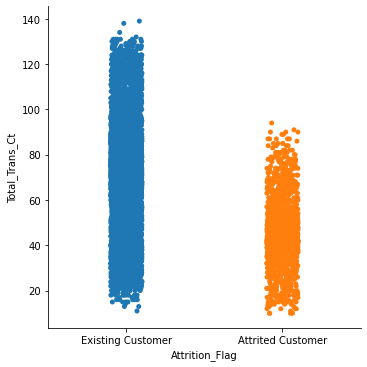

In [25]:
#Catplot of Total_Trans_Amt vs. Attrition Flag
sns.catplot(data=credit_df, x='Attrition_Flag', y='Total_Trans_Ct')

Attrited customers appear to have a max total transaction count of around 90 whereas existing customers can peak at over 130. Attrited customers in general have a smaller total transaction count.

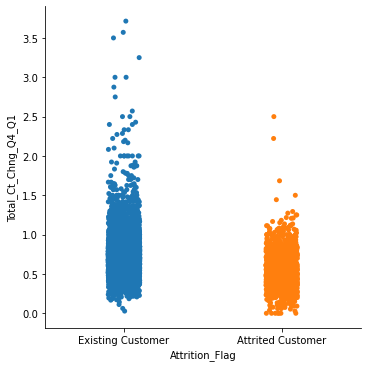

In [26]:
#Catplot of Total_Ct_Chng_Q4_Q1 vs. Attrition Flag
sns.catplot(data=credit_df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')

Considering the variable, **Total_Ct_Chng_Q4_Q1**, is the change in transaction count (Q4/Q1), we can interpret larger values as customers who increased their quarterly transactions throughout the year. There appears to be larger numbers present for existing customers, meaning that if customers continue to increase the number of transactions, it is less likely that they will exit. 

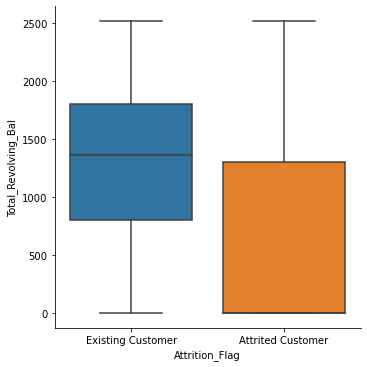

In [27]:
#Catplot of Total_Revolving_Bal vs. Attrition Flag
sns.catplot(data=credit_df, x='Attrition_Flag', y='Total_Revolving_Bal', kind='box')

Existing customers have a higher average total revolving balance than attrited customers - it looks unlikely that a customer above a total revolving balance of $1,300 will exit. This indicates that customers with lower revolving balances to pay off are more likely to exit - they are keeping their obligations low and relatively more free to move on to a competitive opportunity.

It would also be interesting to see how demographic variables compare in terms of attrited vs. existing customers. 

<AxesSubplot:xlabel='Card_Category'>

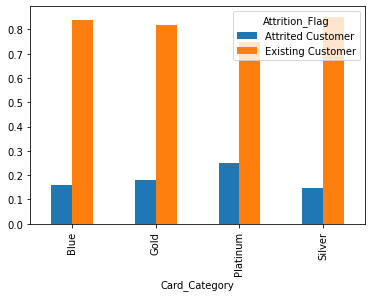

In [28]:
#Compare percentage of attrited customers per card category
(pd.crosstab(credit_df['Card_Category'],credit_df['Attrition_Flag'], 
             normalize='index')
   .plot.bar(stacked=False)
)

The Silver card has the smallest percentage of customers exit, with Blue in a close second. It seems as though there are more issues with exiting customers the higher one climbs up the credit card tiers. There could be an issue with the fee structure of the higher tiers, or they simply could be more difficult to maintain than lower tiers. The customers in the higher tiers may have more income to spend, and can afford to shop around for the best high tier credit card on the market.

How does **Income_Category** compare to **Card_Category** and **Credit_Limit**?

C:\Users\qsencenbaugh\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

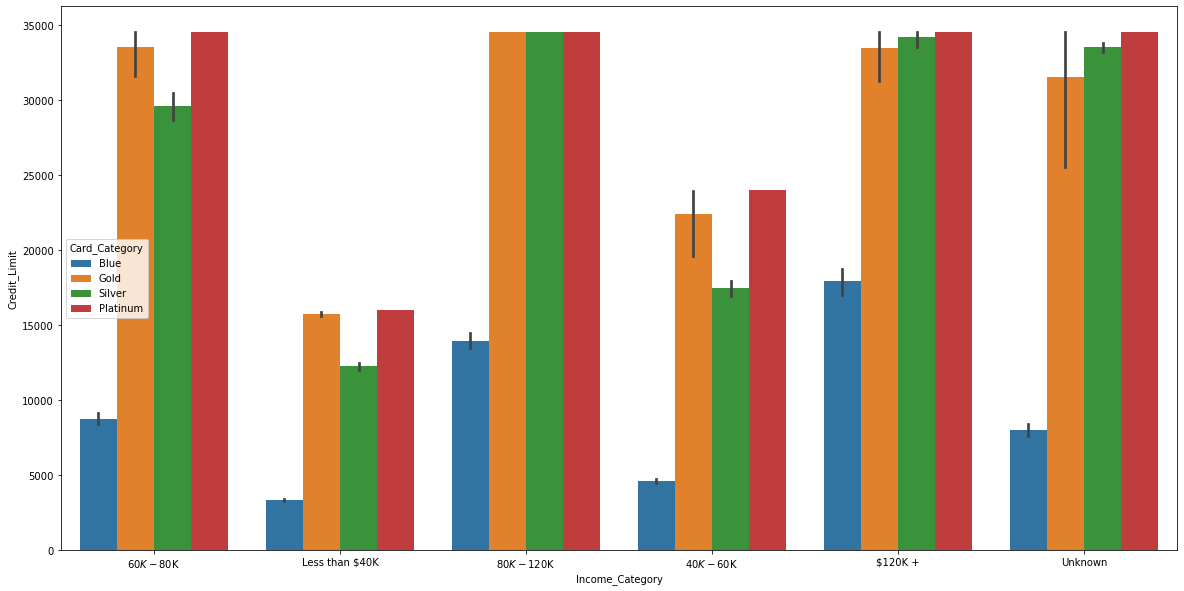

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(credit_df['Income_Category'], credit_df['Credit_Limit'], hue=credit_df['Card_Category'])

Platinum card holders do seem to have the highest relative credit limit in each of the respective income category groups. This further solidifies the point that higher-tier card holders have the financial ability to shop around and find the best deals.

What about **Education_Level**? Does education influence **Credit_Limit**, and how does that differ based on **Attrition_Flag**?

C:\Users\qsencenbaugh\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

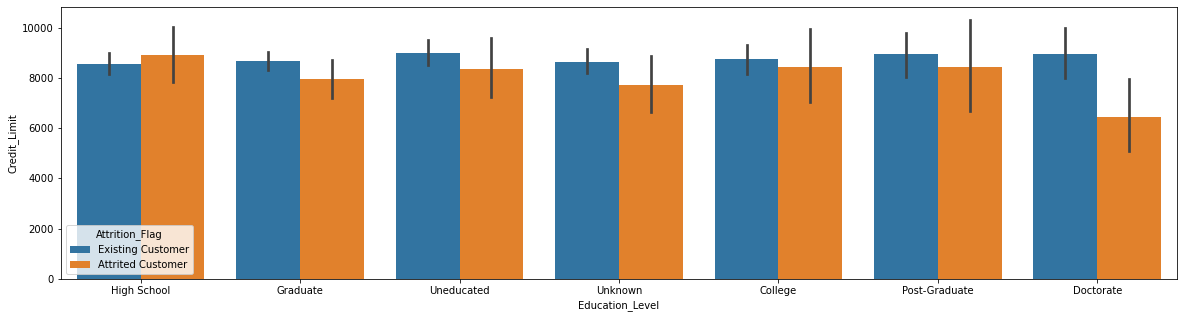

In [30]:
#Compare credit limit by education level - then see how these differ between attrited and existing customers
plt.figure(figsize=(20,5))
sns.barplot(credit_df['Education_Level'], credit_df['Credit_Limit'], hue=credit_df['Attrition_Flag'])

In most cases, attrited customers appear to have smaller credit limits compared to their existing customer counter part within each education level. It is interesting that attrited customers who have a Doctorate have the lowest credit limit of all groups on average. Overall, there doesn't seem to be a clear pattern between **Credit_Limit**, **Education_Level**, and a customer's **Attrition_Flag**.

**Card_Category** also has a notable correlation with **Total_Trans_Ct** - this is particularly interesting considering **Total_Trans_Ct** is the most correlated with **Attrition_Flag** (-0.37). How do these three variables compare? 

C:\Users\qsencenbaugh\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Ct'>

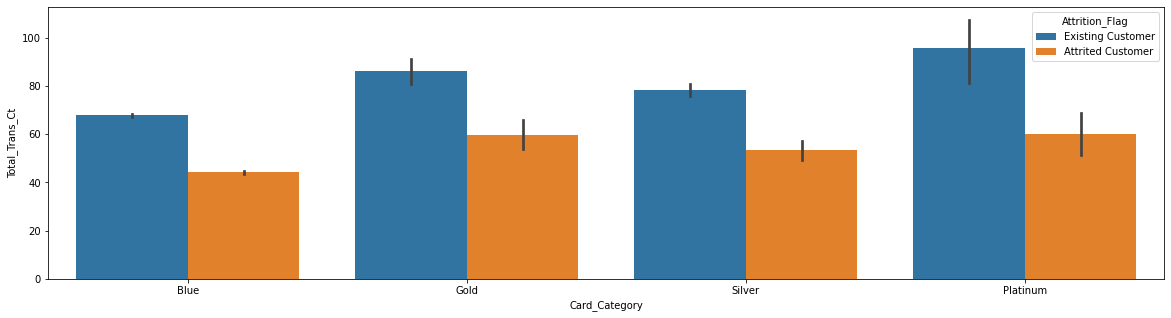

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(credit_df['Card_Category'], credit_df['Total_Trans_Ct'], hue=credit_df['Attrition_Flag'])

In every card category, attrited customers have fewer total transactions than existing customers. As the card category tier rises (Blue-> Silver -> Gold -> Platinum), the total transaction count increases for what appears to be every subgroup. It looks as though attrited customers have around 20 fewer transactions than existing customers in each card group. 

# Model Building

The purpose of the model building stage is to create a highly function classification model that can take in the numerous pieces of customer data and classify whether the customer is likely to churn / cancel their credit card. There are multiple routes that could generate a production grade model that could signficantly help the bank to understand what makes a customer likely to leave - in turn this could impact future marketing strategies, as well as allow them to be proactive and attempt to find methods of mitigating this issue among certain groups. 

## Logistic Regression

## Decision Tree

## Random Forest

Random Forest is a supervised learning algorithm that makes use of decisions trees and can be used for classification and regression tasks. 

In [32]:
# Before we start with the model we need to import the libraries necessary for random forest modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Random Forest needs a labeled target variable, for the model we are building the target variable is the Attrition_Flag and the data we are going to be using is everything else.

In [33]:
# Creating the split between target variable and the rest of our data
target = credit_clean_df["Attrition_Flag"]
data = credit_clean_df.drop("Attrition_Flag", axis=1)

Random forest will not be accurate unless we properly handle categorical data. There are two options, the first is to use dummy variables for any categorical variables. The other is if the data has a natural order it can also be label encoded. Before modeling with a random forest it is important to ensure the data has beeen prepared correctly

In [34]:
# Checking the data types
credit_clean_df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Marital_Status_Divorced       int32
Marital_Status_Married        int32
Marital_Status_Single         int32
Marital_Status_Unknown        int32
Gender_F                      int32
Gender_M                      int32
dtype: object

All of the data has been properly prepared for Random Forest. There data with natural order has already been label encoded, and the data without a nautral order, such as gender, has been one-hot encoded.

For our Model, we are going to save 25% of the data to test the models performance after it has been trained with 75% of the data.

In [35]:
# Splitting the data into the train test split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.25, random_state = 18)

###### Bagging
Bootstrap Aggregation, also known as bagging, is an ensemble method that makes use of decisions trees but has better performance.

In order to use bagging, A Decision Tree Classifier needs to be instantiated.

In [36]:
# Instantiate and fit a DecisionTreeClassifier to be used for the Bagging Classifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train,target_train)

DecisionTreeClassifier(max_depth=5)

The decision tree that was instantiated will be used for creating a bag of trees.

In [37]:
# Instantiate and fit BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

Now that a bag of trees has been instantiated we can fit to the data.

In [38]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

Now that the model has been fit, we can use accuracy as a crude metric for the performance of the ensemble method

In [39]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.9497037524687294

In [40]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.9411532385466035

This bagging ensemble model is scoring with a very high accuracy. Accuracy is not the best indicator of performance, but the goal is to build a random forest model so there is no need to spend to much time on testing the bagging ensemble method.

##### Random Forest
Random Forest is an extension of bagging and is an evolution of the algorithm. Random Forests are general less likely to overfit on the data than some other models.

To begin, we will Instantiate a Random Forest Classifier.

In [41]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

Now that we have our model we can use accuracy as a crude metric for the performance.

In [42]:
# Training accuracy score
forest.score(data_train, target_train)

0.9245556287030942

In [43]:
# Test accuracy score
forest.score(data_test, target_test)

0.9111374407582938

Initially, our random forest is performing slightly worse than the bagging Ensemble. Tuning the hyperparameters of the forest can increase the accuracy of our model.

###### Improving the Random Forest
Now that the Random Forest model is built and a baseline accuracy is established, the next step is to improve the model with hyperparameter tuning.

The easiest way to tune the model will be with a gridsearch that tries multiple parameters and uses the best ones.

In [44]:
# In order to improve the model I will try to tune the hyperparameters. 
from sklearn.model_selection import RandomizedSearchCV as RSCV

In [45]:
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

In [46]:
improved_rf_model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(data_train, target_train)
improved_rf_model = improved_rf_model.best_estimator_

In [47]:
# Training accuracy score
improved_rf_model.score(data_train, target_train)

0.9816984858459513

In [48]:
# Test accuracy score
improved_rf_model.score(data_test, target_test)

0.9601105845181674

Tuning the parameters has increased the accuracy. In order to determine how the model is really performing, it is important to examine more than just accuracy. Checking the important features and other metrics such as recall, F1, confusion matrix, etc. gives a better idea about the model performance.

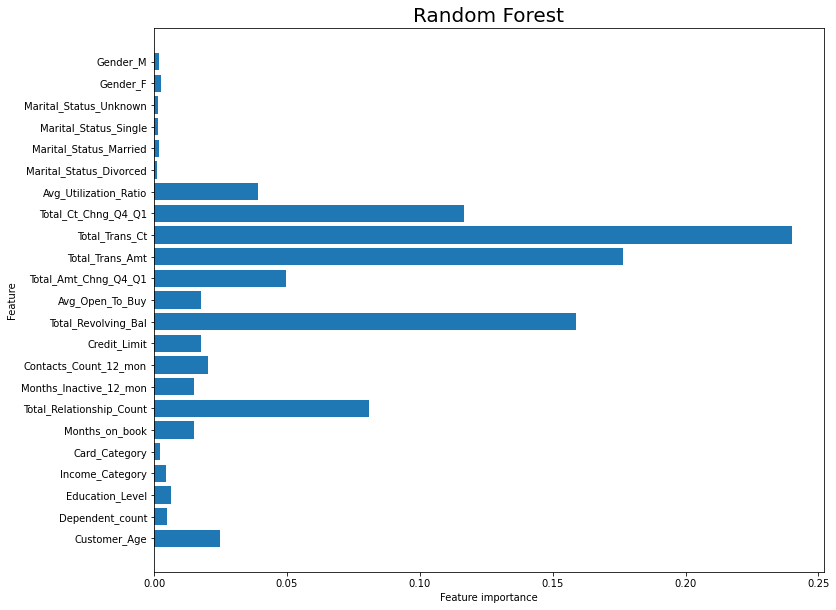

In [49]:
# Now let us get an idea of the Feature importance
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(12,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title("Random Forest", size = 20)
    
plot_feature_importances(improved_rf_model)

This graph indicates that the most important variables are total transaction count, total transaction amount, and total revolving balance. The graph is a good view into the variables that are strong predictors for attrition.

###### Accuracy Rating and other metrics
While an accuracy rating of 96% is pretty high, accuracy is not the best classifier of a models performance. Let us check some additional statistics of our models performance to get a better idea of how it does

A Confusion matrix is a good tool to know the number of false positive and false negative in our model. These are important statistics to know for a business owner. False positive and false negatives could have a large impact on a business, by either predicting churn that does not happen, or missing churn that does.

In [50]:
# Checking the confusion matrix for test data and predictions
target_test_pred = improved_rf_model.predict(data_test)
confusion_matrix(target_test, target_test_pred)

array([[2078,   22],
       [  79,  353]], dtype=int64)

Visualizing the confusion matrix as a heat map can provide some insight into the data as well.

In [51]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(target_test, target_test_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

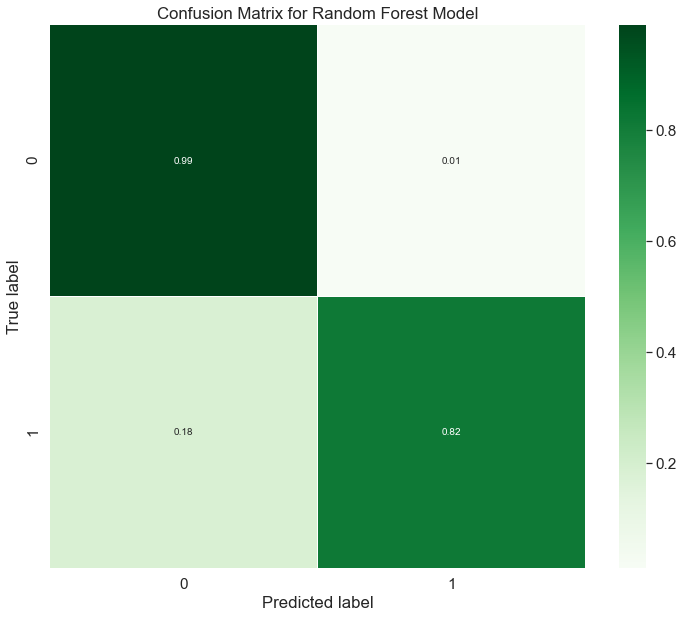

In [52]:
# Build the plot
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

To round out the evaluation of the Random Foreset model, the classification report will provide metrics such as precision, recall, and f-1 score

In [53]:
# View the classification report for test data and predictions
print(classification_report(target_test, target_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2100
           1       0.94      0.82      0.87       432

    accuracy                           0.96      2532
   macro avg       0.95      0.90      0.93      2532
weighted avg       0.96      0.96      0.96      2532



Our data set is a bit imbalanced with 8500 existing customers and only 1627 attrited customers. Due to the imbalance, the macro average is a better indicator for our dataset on the performance of the model. With an macro f-1 score of .93, the model is performing quite well and had a relatively small number of false positive.

## RF XGBoost

## RF AdaBoost

In [ ]:
# Load Library
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
# Step1: Create data set
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)
# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


In [ ]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


## Convolutional Neural Network (CNN)